In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("UniversalBank.csv")
data.head(3)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0


In [9]:
print(data.info)
print(data.describe)
print(data.isnull().sum())

<bound method DataFrame.info of         ID Age Experience Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0        1  25          1     49    91107       4    1.6          1         0   
1        2  45         19     34    90089       3    1.5          1         0   
2        3  39         15     11    94720       1    1.0          1         0   
3        4  35          9    100    94112       1    2.7          2         0   
4        5  35          8     45    91330       4    1.0          2         0   
...    ...  ..        ...    ...      ...     ...    ...        ...       ...   
4995  4996  29          3     40    92697       1    1.9          3         0   
4996  4997  30          4     15    92037       4    0.4          1        85   
4997  4998  63         39     24    93023       2    0.3          3         0   
4998  4999  65         40     49    90034       3    0.5          2         0   
4999  5000  28          4     83    92612       3    0.8          1         0

In [10]:
data.head(4)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0


In [93]:
x=data.drop(["PersonalLoan","ZIPCode","ID"],axis=1)
y=data["PersonalLoan"]

In [94]:
print(x.head(2))
print(y.head(2))

  Age Experience Income  Family  CCAvg  Education  Mortgage  \
0  25          1     49       4    1.6          1         0   
1  45         19     34       3    1.5          1         0   

   SecuritiesAccount  CDAccount  Online  CreditCard  
0                  1          0       0           0  
1                  1          0       0           0  
0    0
1    0
Name: PersonalLoan, dtype: int64


In [100]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                5000 non-null   object 
 1   Experience         5000 non-null   object 
 2   Income             5000 non-null   object 
 3   Family             5000 non-null   int64  
 4   CCAvg              5000 non-null   float64
 5   Education          5000 non-null   int64  
 6   Mortgage           5000 non-null   int64  
 7   SecuritiesAccount  5000 non-null   int64  
 8   CDAccount          5000 non-null   int64  
 9   Online             5000 non-null   int64  
 10  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 429.8+ KB


In [131]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# apply LabelEncoder to each categorical column
for col in ["Age","Experience","Income"]:
    x[col] = le.fit_transform(df[col]).astype('int64')

In [132]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                5000 non-null   int64
 1   Experience         5000 non-null   int64
 2   Income             5000 non-null   int64
 3   Family             5000 non-null   int64
 4   CCAvg              5000 non-null   int64
 5   Education          5000 non-null   int64
 6   Mortgage           5000 non-null   int64
 7   SecuritiesAccount  5000 non-null   int64
 8   CDAccount          5000 non-null   int64
 9   Online             5000 non-null   int64
 10  CreditCard         5000 non-null   int64
dtypes: int64(11)
memory usage: 429.8 KB


In [138]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [139]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((3500, 11), (3500,), (1500, 11), (1500,))

In [140]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [141]:
model.fit(x_train, y_train)

D:\conda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [142]:
y_pred=model.predict(x_test)

In [143]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [147]:
print(accuracy_score(y_test,y_pred)*100)

92.66666666666666


In [146]:
x_pred=model.predict(x_train)
print(accuracy_score(y_train,x_pred)*100)

93.42857142857143


In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

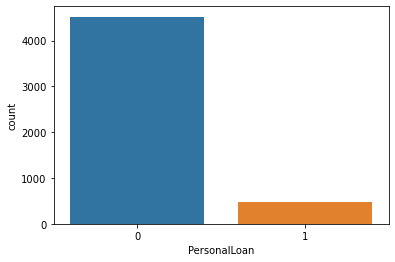

In [150]:
sns.countplot(x="PersonalLoan", data=data)
plt.show()


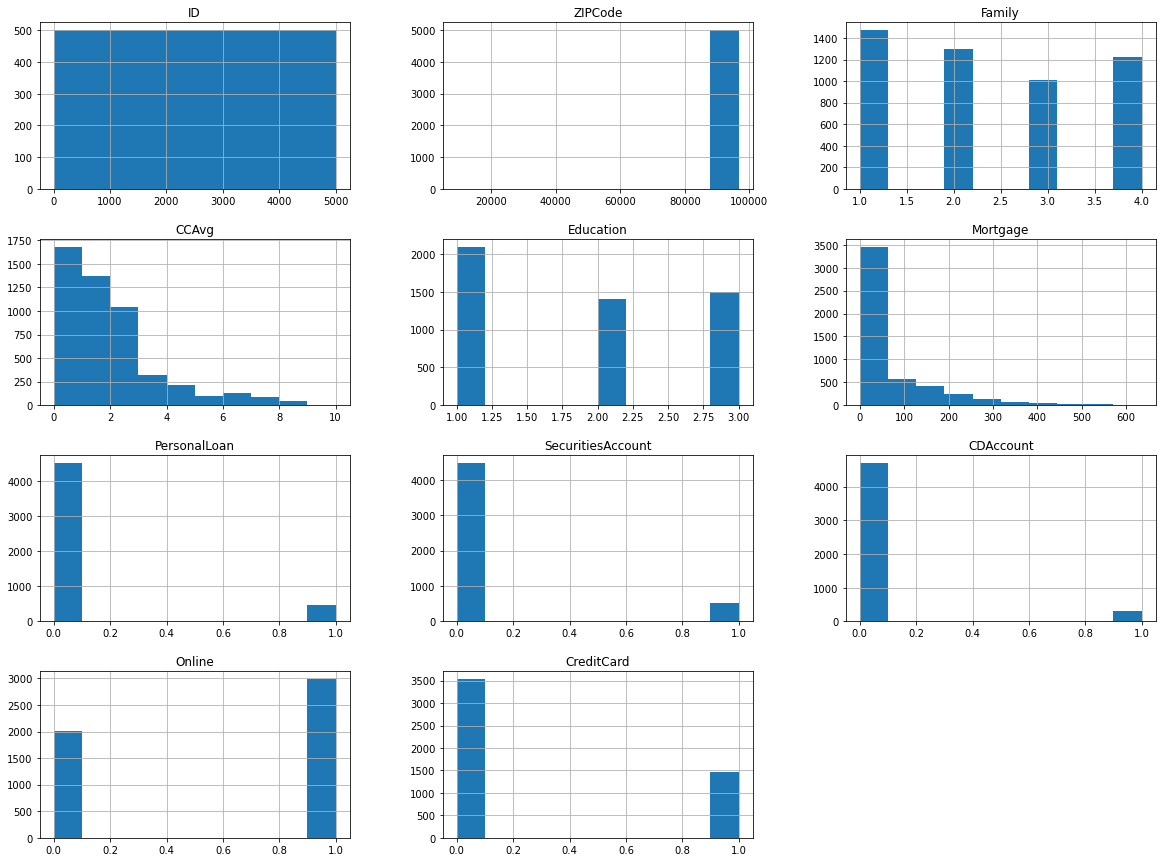

In [155]:
data.hist(bins=10, figsize=(20,15))
plt.show()

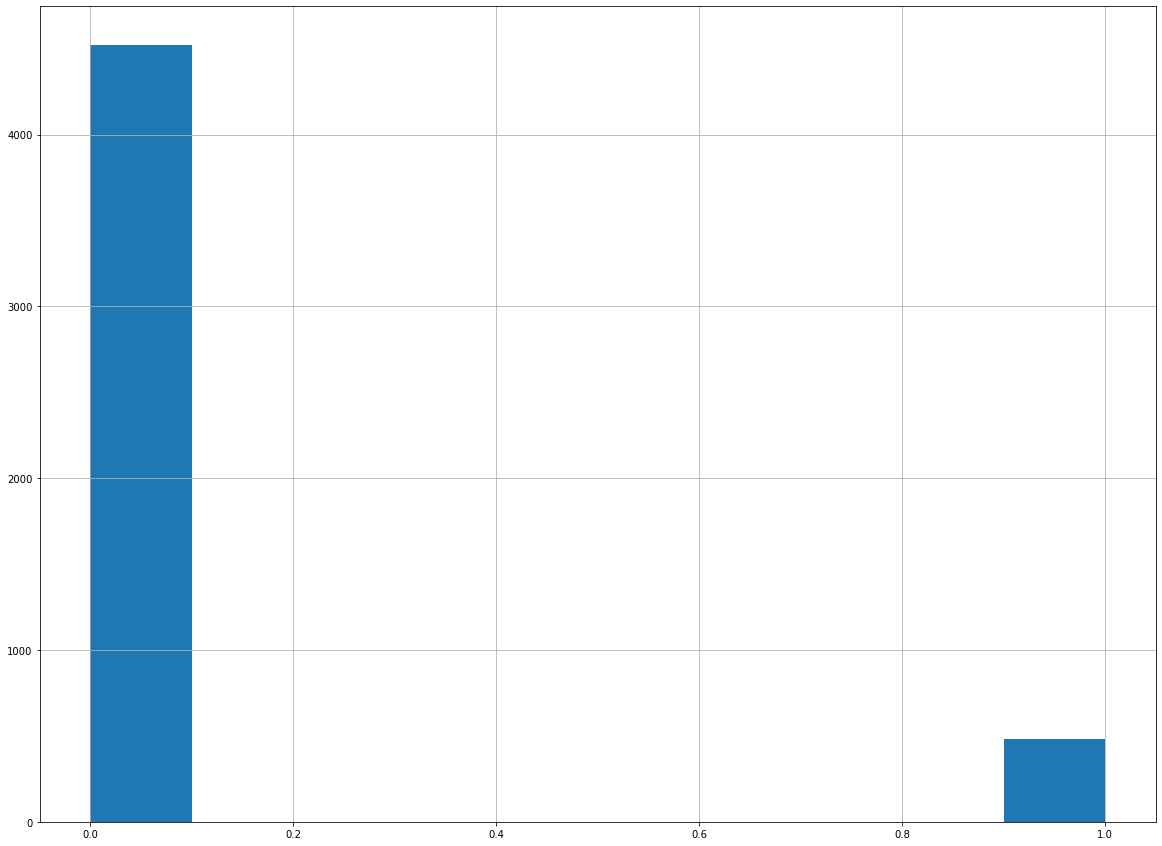

In [154]:
y.hist(bins=10, figsize=(20,15))
plt.show()

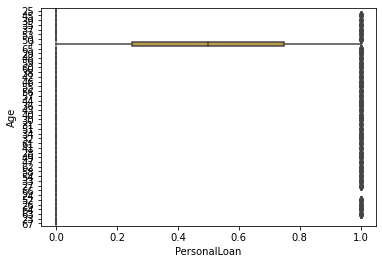

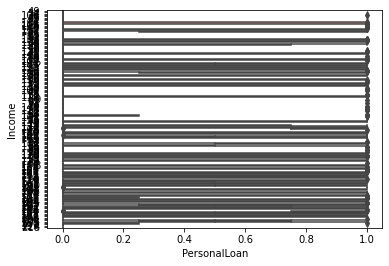

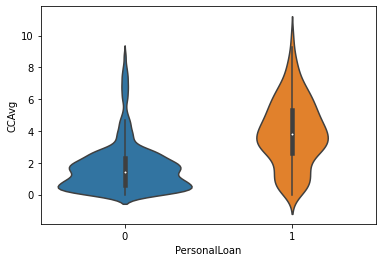

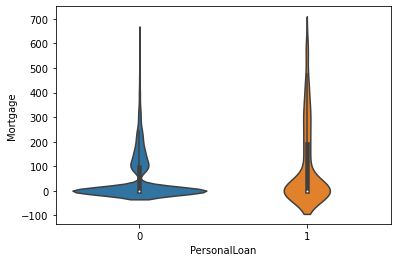

In [158]:
sns.boxplot(x="PersonalLoan", y="Age", data=data)
plt.show()

sns.boxplot(x="PersonalLoan", y="Income", data=data)
plt.show()

sns.violinplot(x="PersonalLoan", y="CCAvg", data=data)
plt.show()

sns.violinplot(x="PersonalLoan", y="Mortgage", data=data)
plt.show()


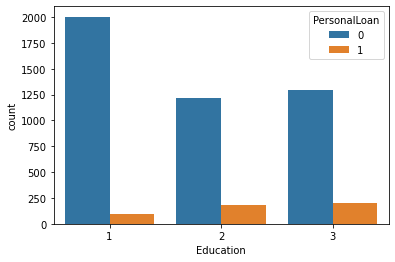

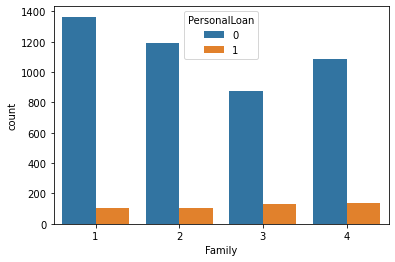

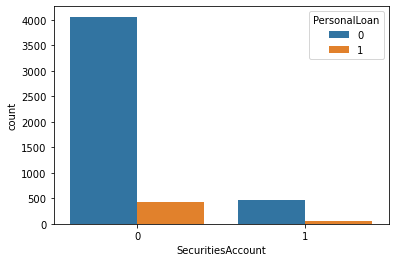

In [161]:
sns.countplot(x="Education", hue="PersonalLoan", data=data)
plt.show()

sns.countplot(x="Family", hue="PersonalLoan", data=data)
plt.show()

sns.countplot(x="SecuritiesAccount", hue="PersonalLoan", data=data)
plt.show()

